# z-score

Measures how many standard deviations a data point is from the mean. Useful for datasets with normal distributions.
- 🚨 Sensitive to Outliers: Can be skewed by extreme values, affecting the results.
- 📉 Assumes Normality: Assumes data is normally distributed, which isn't always the case.

In [113]:
import pandas as pd
from scipy import stats
import numpy as np

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'C:/Users/5060916/Desktop/child_iq.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, delimiter=';')
# df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'ppvt': 'iq', 'momage': 'mom_age'})
df.head()

,id,iq,educ_cat,mom_age
0,355,45,1,23
1,120,38,2,22
2,61,40,1,20
3,150,41,1,19
4,221,42,1,22


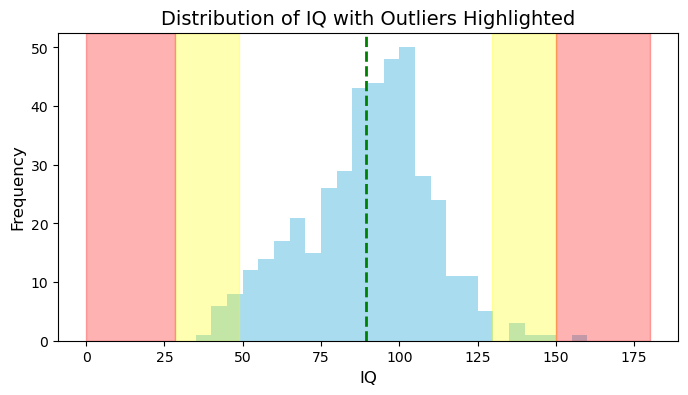

In [115]:
# Apply z-score to detect outliers
df['z_score'] = stats.zscore(df['iq'])
df['outlier'] = df['z_score'].abs() > 3

# Calculate mean and standard deviation
mean_iq = df['iq'].mean()
std_iq = df['iq'].std()

# Set up the plot
plt.figure(figsize=(8, 4))
plt.hist(df['iq'], bins=np.arange(0, 170, 5), color='skyblue',  alpha=0.7)

# Highlight the outliers
outliers = df[df['outlier']]['iq']

# Plot mean line
plt.axvline(mean_iq, color='green', linestyle='dashed', linewidth=2, label='Mean IQ')

# Fill between z2 to z3 limits with transparent yellow
plt.axvspan(mean_iq - 3 * std_iq, mean_iq - 2 * std_iq, color='yellow', alpha=0.3, label='Z2 to Z3')
plt.axvspan(mean_iq + 2 * std_iq, mean_iq + 3 * std_iq, color='yellow', alpha=0.3)

# Fill beyond z3 with red transparent
plt.axvspan(0, mean_iq - 3 * std_iq, color='red', alpha=0.3, label='Beyond Z3')
plt.axvspan(mean_iq + 3 * std_iq, 180, color='red', alpha=0.3)

# Customize the appearance
plt.xlabel('IQ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of IQ with Outliers Highlighted', fontsize=14)
plt.grid(False)  # Remove grid

# Show the plot
plt.show()

In [116]:
# Calculate thresholds
z1_threshold_low = mean_iq - 1 * std_iq
z1_threshold_high = mean_iq + 1 * std_iq
z2_threshold_low = mean_iq - 2 * std_iq
z2_threshold_high = mean_iq + 2 * std_iq
z3_threshold_low = mean_iq - 3 * std_iq
z3_threshold_high = mean_iq + 3 * std_iq

# Count the number of values in each region
total_values = len(df)
beyond_z3 = df[(df['iq'] < z3_threshold_low) | (df['iq'] > z3_threshold_high)]
between_z2_z3 = df[((df['iq'] >= z2_threshold_high) & (df['iq'] <= z3_threshold_high)) |
                    ((df['iq'] >= z3_threshold_low) & (df['iq'] <= z2_threshold_low))]
between_z1_z2 = df[((df['iq'] >= z1_threshold_high) & (df['iq'] <= z2_threshold_high)) |
                    ((df['iq'] >= z2_threshold_low) & (df['iq'] <= z1_threshold_low))]

# Calculate percentages
percent_beyond_z3 = (len(beyond_z3) / total_values) * 100
percent_between_z2_z3 = (len(between_z2_z3) / total_values) * 100
percent_between_z1_z2 = (len(between_z1_z2) / total_values) * 100

print(f"Percentage of values beyond z3: {percent_beyond_z3:.2f}%")
print(f"Percentage of values between z2 and z3: {percent_between_z2_z3:.2f}%")
print(f"Percentage of values between z1 and z2: {percent_between_z1_z2:.2f}%")

Percentage of values beyond z3: 0.24%
Percentage of values between z2 and z3: 4.30%
Percentage of values between z1 and z2: 26.49%


# Modified z-score

Uses median and MAD (Median Absolute Deviation), making it more robust to outliers and non-normal distributions.
- 🚀 Robust to Outliers: Less sensitive to extreme values compared to the regular Z-score.
- Uses median and median absolute deviation (MAD), which are less influenced by outliers than mean and standard deviation.
- ⚖️ Better for Skewed Data: Handles skewed distributions better.

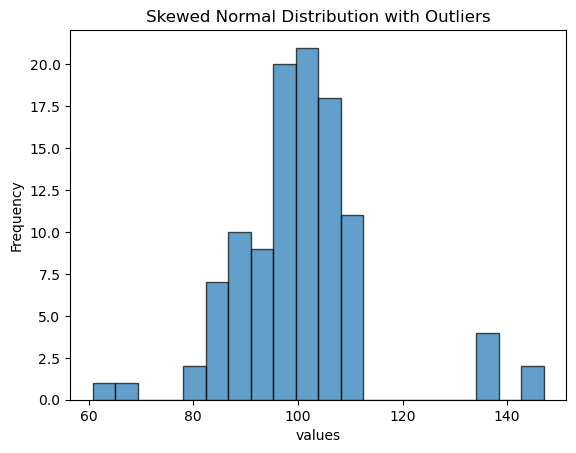

(           values
 count  106.000000
 mean   100.490634
 std     13.134618
 min     60.781478
 25%     94.416708
 50%     99.937971
 75%    105.959454
 max    147.000000,
        values
 0  102.912632
 1   80.325917
 2  103.411454
 3   92.852215
 4  110.430175)

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Parameters
target_mean = 110
target_std = 15
size = 100  # Number of data points

# Generate a skewed normal distribution
alpha = -6  # Negative value for left skew
data_skew_left = skewnorm.rvs(a=alpha, loc=target_mean, scale=target_std, size=int(size))
additional_values = np.full(4, 135)
additional_values_equ = np.full(2, 147)
data_with_outliers = np.concatenate([data_skew_left, additional_values, additional_values_equ])

# Create a dataframe
df = pd.DataFrame(data_with_outliers, columns=['values'])

# Plot the distribution
plt.hist(df['values'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Skewed Normal Distribution with Outliers')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.show()

# Display the dataframe's statistics and first few rows
df.describe(), df.head()

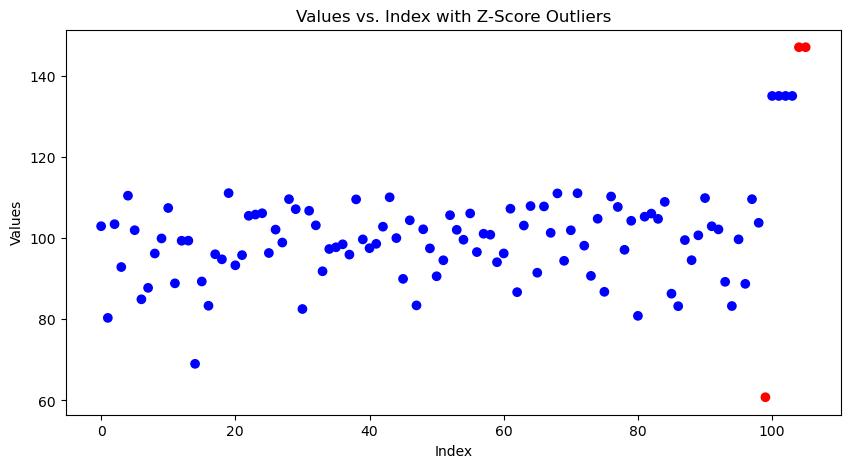

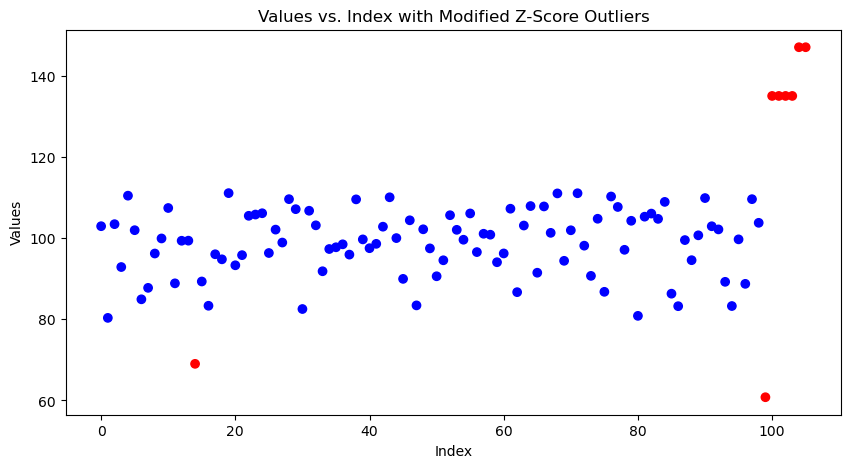

,values,z_score,z_outlier,modified_z_score,mod_z_outlier
0,102.912632,0.185274,False,0.341633,False
1,80.325917,-1.542528,False,-2.252401,False
2,103.411454,0.223432,False,0.398922,False
3,92.852215,-0.584311,False,-0.813783,False
4,110.430175,0.760339,False,1.205007,False
...,...,...,...,...,...
101,135.000000,2.639841,False,4.026797,True
102,135.000000,2.639841,False,4.026797,True
103,135.000000,2.639841,False,4.026797,True
104,147.000000,3.557798,True,5.404971,True


In [127]:
df['z_score'] = zscore(df['values'])

# Identify outliers (z-score > 3 or < -3)
df['z_outlier'] = df['z_score'].abs() > 3

# Plot scatterplot for z-score
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['values'], c=np.where(df['z_outlier'], 'red', 'blue'))
plt.title('Values vs. Index with Z-Score Outliers')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

# Calculate median and median absolute deviation for modified z-score
median = df['values'].median()
mad = np.median(np.abs(df['values'] - median))
df['modified_z_score'] = 0.6745 * (df['values'] - median) / mad

# Identify outliers (modified z-score > 3.5 or < -3.5)
df['mod_z_outlier'] = df['modified_z_score'].abs() > 3.5

# Plot scatterplot for modified z-score
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['values'], c=np.where(df['mod_z_outlier'], 'red', 'blue'))
plt.title('Values vs. Index with Modified Z-Score Outliers')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

df